In [2]:
import dill
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/scplus_obj_gene_based.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

In [3]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 4498 x 19629 and n_cells x n_regions = 4498 x 450312
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_cell:'Spatial_domain', 'Landmark', 'Cell_type'
	menr:'CTX_DARs_All_cluster_db', 'CTX_DARs_No_promoters_cluster_db', 'CTX_Topics_All_cluster_db', 'CTX_Topics_No_promoters_cluster_db', 'CTX_Clean-topics_All_cluster_db', 'CTX_Clean-topics_No_promoters_cluster_db', 'CTX_MACS-bdgdiff_All_cluster_db', 'CTX_MACS-bdgdiff_No_promoters_cluster_db', 'CTX_DARs_All_all_motifs_db', 'CTX_DARs_No_promoters_all_motifs_db', 'CTX_Topics_All_all_motifs_db', 'CTX_Topics_No_promoters_all_motifs_db', 'CTX_Clean-topics_All_all_motifs_db', 'CTX_Clean-topics_No_promoters_all_motifs_db', 'CTX_MACS-bdgdiff_All_all_motifs_db', 'CTX_MACS-bdgdiff_No_promoters_all_motifs_db', 'DEM_DARs_All_cluster_db', 'DEM_DARs_No_promoters_cluster_db', 'DEM_Topics_All_cluster_db', 'DEM_Topic

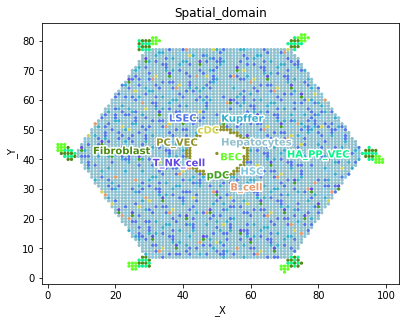

In [4]:
from scenicplus.dimensionality_reduction import *
plot_metadata(scplus_obj,
                 reduction_name='Virtual Map',
                 variables=['Spatial_domain'],
                 num_columns=1,
                 text_size=10,
                 dot_size=5)

In [15]:
color_dict_liver = {'B_cell': "#F8766D",
                   'BEC':"#E9842C",
                   'cDC':"#D69100",
                   'Fibroblast':"#BC9D00",
                   'Hep_PP_PC_1': "#9CA700",
                   'Hep_PP_PC_2' : "#6FB000",
                   'Hep_PP_PC_3' :  "#00B813",
                   'Hep_PP_PC_4' : "#00BD61",
                   'Hep_PP_PC_5' : "#00C08E",
                   'HSC' : "#00C0B4", 
                   'Kupffer' : "#00BDD4",
                   'Kupffer_cycling' : "#00B5EE",
                   'LSEC' : "#00A7FF",
                   'MSC' : "#7F96FF",
                   'pDC' : "#BC81FF",
                   'T_cell' : "#E26EF7",
                   'VEC_LY' :  "#F863DF",
                   'VEC_PC' : "#FF62BF",
                   'VEC_PP' : "#FF6A9A"}

In [12]:
scplus_obj.to_df('EXP').columns

Index(['0610005C13Rik', '0610006L08Rik', '0610009B22Rik', '0610010F05Rik',
       '0610012D04Rik', '0610012G03Rik', '0610025J13Rik', '0610030E20Rik',
       '0610031O16Rik', '0610033M10Rik',
       ...
       'mt-Co2', 'mt-Co3', 'mt-Cytb', 'mt-Nd1', 'mt-Nd2', 'mt-Nd3', 'mt-Nd4',
       'mt-Nd4l', 'mt-Nd5', 'mt-Nd6'],
      dtype='object', length=19629)

In [14]:
x = list(set(scplus_obj.uns['eRegulon_metadata']['Gene']))
x = [x for x in scplus_obj.to_df('EXP').columns]

In [15]:
from pycisTopic.diff_features import find_highly_variable_features
hvg = find_highly_variable_features(scplus_obj.to_df('EXP')[x].T, n_top_features = 200, plot = False)

2022-10-06 18:30:46,965 cisTopic     INFO     Calculating mean
2022-10-06 18:30:47,208 cisTopic     INFO     Calculating variance
2022-10-06 18:30:48,839 cisTopic     INFO     Done!


<Figure size 432x288 with 0 Axes>

In [ ]:
# Run in genius
import os
os.chdir('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/')
import dill
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/scplus_obj_gene_based.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

x = list(set(scplus_obj.uns['eRegulon_metadata']['Gene']))
x = [x for x in scplus_obj.to_df('EXP').columns]
from pycisTopic.diff_features import find_highly_variable_features
hvg = find_highly_variable_features(scplus_obj.to_df('EXP')[x].T, n_top_features = 200, plot = False)

hvg = list(set(hvg + ['Tbx3', 'Tcf7l1', 'Hnf4a', 'Cebpa', 'Foxa1', 'Onecut1', 'Tcf7l2', 'Cyp2e1', 'Hal', 'Cdh1', 'Aspg', 'Ass1', 'Arg1', 'Dlgap1', 'Pck1', 'Plxna2', 'Axin2', 'Gne', 'Gulo', 'Nt5e']))

scplus_obj.uns['eRegulon_metadata'] = scplus_obj.uns['eRegulon_metadata'][scplus_obj.uns['eRegulon_metadata']['Gene'].isin(scplus_obj.to_df('EXP').columns)]
scplus_obj.uns['eRegulon_metadata'] = scplus_obj.uns['eRegulon_metadata'][scplus_obj.uns['eRegulon_metadata']['TF'].isin(scplus_obj.to_df('EXP').columns)]

perturb_list=[{'Tbx3': 0},
              {'Tcf7l1': 0}]
perturbed_matrix_dict={}

from scenicplus.simulation import *
for e in range(len(perturb_list)):
    k = list(perturb_list[e].keys())[0]
    perturbed_matrix_dict[k] = simulate_perturbation(
            scplus_obj = scplus_obj,
            perturbation = perturb_list[e], 
            eRegulon_metadata_key = 'eRegulon_metadata',
            n_iter = 10, 
            regressors = None, 
            genes = hvg, 
            regressor_type = 'GBM',
            regressor_kwargs = None, 
            eRegulons_to_use = None, 
            keep_intermediate = True)
    
sel_mat = {}
for k in perturbed_matrix_dict.keys():
    sel_mat[k] =  perturbed_matrix_dict[k]['11']
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/perturb_matrix_KD_last_iter.pkl', 'wb') as f:
  pickle.dump(sel_mat, f)

sel_mat = {}
for k in perturbed_matrix_dict.keys():
    sel_mat[k] =  perturbed_matrix_dict[k]['6']
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/perturb_matrix_KD_5th_iter.pkl', 'wb') as f:
  pickle.dump(sel_mat, f)


for k in perturbed_matrix_dict.keys():
    for i in perturbed_matrix_dict[k].keys():
        perturbed_matrix_dict[k][i] = perturbed_matrix_dict[k][i].loc[:,hvg]

# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/perturb_matrix_only_hvg_KD.pkl', 'wb') as f:
  pickle.dump(perturbed_matrix_dict, f)

from scenicplus.eregulon_enrichment import *
perturbed_matrix_dict = {}
for k in sel_mat.keys():
    perturbed_matrix = sel_mat[k] 
    perturbed_ranking = _make_rankings(perturbed_matrix)
    perturbed_matrix_dict[k] = score_eRegulons(
            scplus_obj = scplus_obj,
            ranking = perturbed_ranking,
            eRegulon_signatures_key = 'eRegulon_signatures',
            enrichment_type = 'gene',
            inplace = False,
            n_cpu = 8)
    
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/perturb_score_regulons_5th_iteration_KD.pkl', 'wb') as f:
  pickle.dump(perturbed_matrix_dict, f)

delta_embedding_dict={}
for k in perturbed_matrix_dict.keys():
    delta_embedding_dict[k] = _project_perturbation_in_embedding(
        scplus_obj = scplus_obj, 
        original_matrix = scplus_obj.uns['eRegulon_AUC']['Gene_based'], 
        perturbed_matrix = perturbed_matrix_dict[k], 
        reduction_name = 'Virtual Map', 
        sigma_corr = 0.05, 
        n_cpu = 8)
    
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/delta_embedding_5th_iteration_KD.pkl', 'wb') as f:
  pickle.dump(delta_embedding_dict, f)


embedding = scplus_obj.dr_cell['Virtual Map'].to_numpy()
grid_xy={}
uv={}
mask={}
distances={}
grid_offset_frac = 0.005
grid_n_cols = 25
grid_n_rows = 25
grid_n_neighbors = 25
n_cpu = 8
for k in delta_embedding_dict.keys():
    grid_xy[k], uv[k], mask[k] = _calculate_grid_arrows(
        embedding=embedding, 
        delta_embedding=delta_embedding_dict[k],
        offset_frac=grid_offset_frac,
        n_grid_cols=grid_n_cols,
        n_grid_rows=grid_n_rows,
        n_neighbors=grid_n_neighbors,
        n_cpu=n_cpu)
    
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/grid_xy_5th_iteration_KD.pkl', 'wb') as f:
  pickle.dump(grid_xy, f)
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/uv_5th_iteration_KD.pkl', 'wb') as f:
  pickle.dump(uv, f)
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/mask_5th_iteration_KD.pkl', 'wb') as f:
  pickle.dump(mask, f)

In [ ]:
from scenicplus.simulation import *
perturbed_matrix_dict = {}
for TF in ['Tbx3', 'Tcf7l1']:
    x = scplus_obj.to_df('EXP')[TF].copy()
    val = max(x)
    hep_cells = scplus_obj.metadata_cell[scplus_obj.metadata_cell.Spatial_domain.str.contains('Hep')].index.tolist()
    x[hep_cells] = val
    x = x.tolist()
    perturbation = {TF: x}
    perturbed_matrix_dict[TF] = simulate_perturbation(
                scplus_obj = scplus_obj,
                perturbation = perturbation, 
                eRegulon_metadata_key = 'eRegulon_metadata',
                n_iter = 10, 
                regressors = None, 
                genes = hvg, 
                regressor_type = 'GBM',
                regressor_kwargs = None, 
                eRegulons_to_use = None, 
                keep_intermediate = True)

    
sel_mat = {}
for k in perturbed_matrix_dict.keys():
    sel_mat[k] =  perturbed_matrix_dict[k]['11']
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/perturb_matrix_OE_last_iter.pkl', 'wb') as f:
  pickle.dump(sel_mat, f)

sel_mat = {}
for k in perturbed_matrix_dict.keys():
    sel_mat[k] =  perturbed_matrix_dict[k]['6']
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/perturb_matrix_OE_5th_iter.pkl', 'wb') as f:
  pickle.dump(sel_mat, f)


for k in perturbed_matrix_dict.keys():
    for i in perturbed_matrix_dict[k].keys():
        perturbed_matrix_dict[k][i] = perturbed_matrix_dict[k][i].loc[:,hvg]

# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/perturb_matrix_only_hvg_OE.pkl', 'wb') as f:
  pickle.dump(perturbed_matrix_dict, f)

from scenicplus.eregulon_enrichment import *
perturbed_matrix_dict = {}
for k in sel_mat.keys():
    perturbed_matrix = sel_mat[k] 
    perturbed_ranking = _make_rankings(perturbed_matrix)
    perturbed_matrix_dict[k] = score_eRegulons(
            scplus_obj = scplus_obj,
            ranking = perturbed_ranking,
            eRegulon_signatures_key = 'eRegulon_signatures',
            enrichment_type = 'gene',
            inplace = False,
            n_cpu = 8)
    
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/perturb_score_regulons_5th_iteration_OE.pkl', 'wb') as f:
  pickle.dump(perturbed_matrix_dict, f)

delta_embedding_dict={}
for k in perturbed_matrix_dict.keys():
    delta_embedding_dict[k] = _project_perturbation_in_embedding(
        scplus_obj = scplus_obj, 
        original_matrix = scplus_obj.uns['eRegulon_AUC']['Gene_based'], 
        perturbed_matrix = perturbed_matrix_dict[k], 
        reduction_name = 'Virtual Map', 
        sigma_corr = 0.05, 
        n_cpu = 8)
    
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/delta_embedding_5th_iteration_OE.pkl', 'wb') as f:
  pickle.dump(delta_embedding_dict, f)


embedding = scplus_obj.dr_cell['Virtual Map'].to_numpy()
grid_xy={}
uv={}
mask={}
distances={}
grid_offset_frac = 0.005
grid_n_cols = 25
grid_n_rows = 25
grid_n_neighbors = 25
n_cpu = 8
for k in delta_embedding_dict.keys():
    grid_xy[k], uv[k], mask[k] = _calculate_grid_arrows(
        embedding=embedding, 
        delta_embedding=delta_embedding_dict[k],
        offset_frac=grid_offset_frac,
        n_grid_cols=grid_n_cols,
        n_grid_rows=grid_n_rows,
        n_neighbors=grid_n_neighbors,
        n_cpu=n_cpu)
    
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/grid_xy_5th_iteration_OE.pkl', 'wb') as f:
  pickle.dump(grid_xy, f)
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/uv_5th_iteration_OE.pkl', 'wb') as f:
  pickle.dump(uv, f)
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/mask_5th_iteration_OE.pkl', 'wb') as f:
  pickle.dump(mask, f)

In [1]:
import dill
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/scplus_obj_gene_based.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

In [11]:
# Load grid data
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/grid_xy_5th_iteration_KD.pkl', 'rb')
grid_xy_dict = dill.load(infile)
infile.close()
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/uv_5th_iteration_KD.pkl', 'rb')
uv_dict = dill.load(infile)
infile.close()
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/mask_5th_iteration_KD.pkl', 'rb')
mask_dict = dill.load(infile)
infile.close()

In [12]:
# ScoMAP colors
color_dict_liver = {'Hepatocytes': "#8B5A2B",
                   'PC_VEC':"#FFA500",
                   'HA_PP_VEC':"#FF4040",
                   'VEC_LY':"#8B2323",
                   'Fibroblast':  "#000000",
                   'BEC' :  "#228B22",
                   'HSC' :  "#1E90FF" ,
                   'LSEC' : "#00008B",
                   'Kupffer' :  "#FFB6C1",
                   'HSC' : "#00C0B4", 
                   'Kupffer' : "#00BDD4",
                   'B_cell' : "#98FB98",
                   'T_NK_cell' : "#548B54",
                   'cDC' : "#54FF9F" ,
                   'pDC' :  "#43CD80"}

In [13]:
# To match with RNA
color_dict_liver = {'B_cell': "#F8766D",
                   'BEC':"#E9842C",
                   'cDC':"#D69100",
                   'Fibroblast':"#BC9D00",
                   'Hep_PP_PC_1': "#9CA700",
                   'Hep_PP_PC_2' : "#6FB000",
                   'Hep_PP_PC_3' :  "#00B813",
                   'Hep_PP_PC_4' : "#00BD61",
                   'Hep_PP_PC_5' : "#00C08E",
                   'HSC' : "#00C0B4", 
                   'Kupffer' : "#00BDD4",
                   'Kupffer_cycling' : "#00B5EE",
                   'LSEC' : "#00A7FF",
                   'MSC' : "#7F96FF",
                   'pDC' : "#BC81FF",
                   'T_cell' : "#E26EF7",
                   'VEC_LY' :  "#F863DF",
                   'VEC_PC' : "#FF62BF",
                   'VEC_PP' : "#FF6A9A"}


color_dict_liver = {'Hepatocytes': "#8B5A2B",
                   'PC_VEC':"#FF62BF",
                   'HA_PP_VEC':"#FF6A9A",
                   'VEC_LY':"#F863DF",
                   'Fibroblast':  "#BC9D00",
                   'BEC' :  "#E9842C",
                   'HSC' :  "#00C0B4" ,
                   'LSEC' :  "#00A7FF",
                   'Kupffer' :  "#00BDD4",
                   'B_cell' : "#F8766D",
                   'T_NK_cell' : "#E26EF7",
                   'cDC':"#D69100",
                   'pDC' : "#BC81FF"}

Tbx3
Tcf7l1


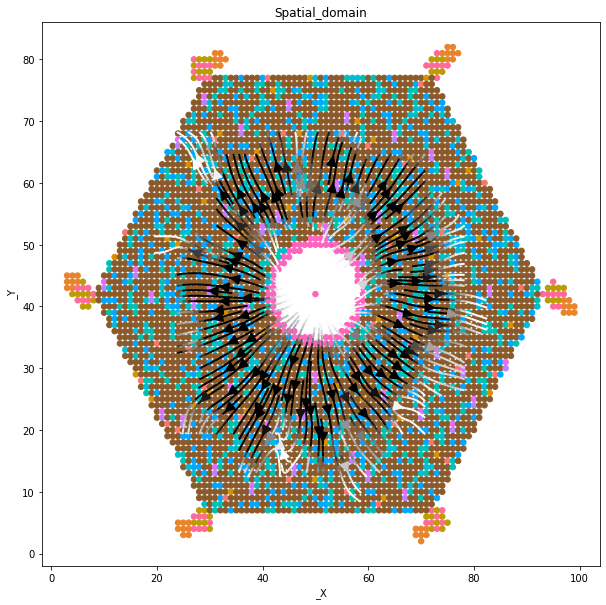

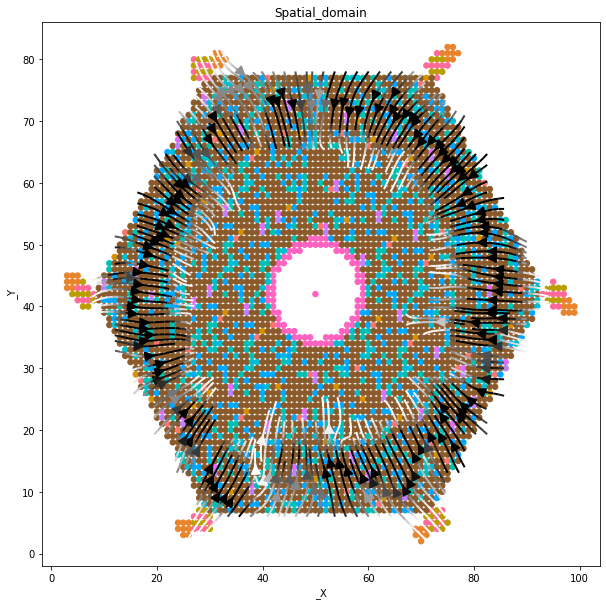

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scenicplus.dimensionality_reduction import plot_metadata_given_ax
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.font_manager
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
grid_offset_frac = 0.005
grid_n_cols = 25
grid_n_rows = 25
grid_n_neighbors = 25
n_cpu = 8
for k in ['Tbx3', 'Tcf7l1']:
    print(k)
    grid_xy = grid_xy_dict[k].copy() 
    uv = uv_dict[k].copy()
    mask = mask_dict[k].copy()
    distances = np.sqrt((uv**2).sum(1))
    norm = matplotlib.colors.Normalize(vmin=0.15, vmax=0.5, clip=True)
    scale = lambda X: [(x - min(X)) / (max(X) - min(X)) for x in X]
    uv[np.logical_or(~mask, np.array(scale(distances)) < 0.05)] = np.nan
    fig, ax = plt.subplots(figsize=(10,10))
    #plt.title(k)
    ax = plot_metadata_given_ax(
        scplus_obj=scplus_obj,
        reduction_name='Virtual Map',
        ax = ax,
        variable = 'Spatial_domain',
        show_label = False,
        color_dictionary =  {'Spatial_domain': color_dict_liver},
        dot_size=30)
    ax.streamplot(
            grid_xy.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 0],
            grid_xy.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 1],
            uv.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 0],
            uv.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 1], 
            density = 3, 
            color = np.array(scale(distances)).reshape(grid_n_cols, grid_n_rows),
            cmap = 'Greys', 
            zorder = 10, 
            norm = norm,
            linewidth = 2,
            arrowsize= 2)
    #plt.show()
    plt.savefig('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/KD_'+k+'.pdf')

In [20]:
# Load grid data
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/grid_xy_5th_iteration_OE.pkl', 'rb')
grid_xy_dict = dill.load(infile)
infile.close()
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/uv_5th_iteration_OE.pkl', 'rb')
uv_dict = dill.load(infile)
infile.close()
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/mask_5th_iteration_OE.pkl', 'rb')
mask_dict = dill.load(infile)
infile.close()

Tbx3
Tcf7l1


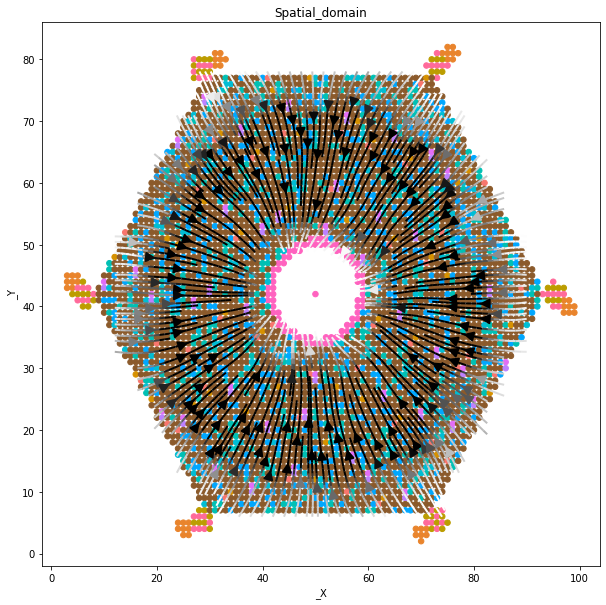

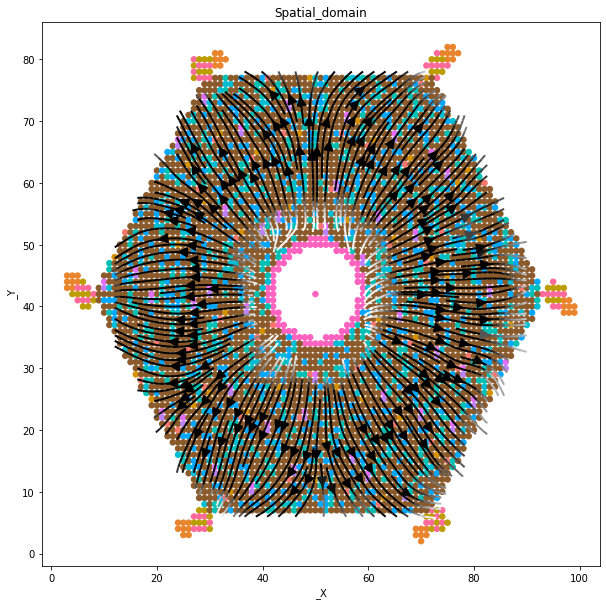

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scenicplus.dimensionality_reduction import plot_metadata_given_ax
grid_offset_frac = 0.005
grid_n_cols = 25
grid_n_rows = 25
grid_n_neighbors = 25
n_cpu = 8
for k in ['Tbx3', 'Tcf7l1']:
    print(k)
    grid_xy = grid_xy_dict[k].copy() 
    uv = uv_dict[k].copy()
    mask = mask_dict[k].copy()
    distances = np.sqrt((uv**2).sum(1))
    norm = matplotlib.colors.Normalize(vmin=0.15, vmax=0.5, clip=True)
    scale = lambda X: [(x - min(X)) / (max(X) - min(X)) for x in X]
    uv[np.logical_or(~mask, np.array(scale(distances)) < 0.05)] = np.nan
    fig, ax = plt.subplots(figsize=(10,10))
    #plt.title(k)
    ax = plot_metadata_given_ax(
        scplus_obj=scplus_obj,
        reduction_name='Virtual Map',
        ax = ax,
        variable = 'Spatial_domain',
        show_label = False,
        color_dictionary =  {'Spatial_domain': color_dict_liver},
        dot_size=30)
    ax.streamplot(
            grid_xy.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 0],
            grid_xy.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 1],
            uv.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 0],
            uv.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 1], 
            density = 3, 
            color = np.array(scale(distances)).reshape(grid_n_cols, grid_n_rows),
            cmap = 'Greys', 
            zorder = 10, 
            norm = norm,
            linewidth = 2,
            arrowsize=2)
    #plt.show()
    plt.savefig('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/OE_'+k+'.pdf')

In [1]:
# Plot genes over iterations
## Load data
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/perturb_matrix_only_hvg_KD.pk', 'rb')
perturb_matrix_dict = dill.load(infile)
infile.close()

FileNotFoundError: [Errno 2] No such file or directory: '/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/ScoMAP_RNA_integrated_HQ_HQ/perturb_matrix_only_hvg_KD.pk'

In [ ]:
scenic